<a href="https://colab.research.google.com/github/samiha-mahin/Ovarian-cancer/blob/main/data_preProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samihamuntahamahin","key":"1ad5aaba9143fbd38da418ad8d278398"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d bitsnpieces/ovarian-cancer-and-subtypes-dataset-histopathology


Dataset URL: https://www.kaggle.com/datasets/bitsnpieces/ovarian-cancer-and-subtypes-dataset-histopathology
License(s): CC-BY-SA-4.0


In [4]:
!unzip ovarian-cancer-and-subtypes-dataset-histopathology.zip -d ovarian_data


Archive:  ovarian-cancer-and-subtypes-dataset-histopathology.zip
  inflating: ovarian_data/OvarianCancer/Clear_Cell/35.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/41.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/46.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/61.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C28.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C29.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C30.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C31.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C32.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C34.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C37.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C39.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C40.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C42.JPG  
  inflating: ovarian_data/OvarianCancer/Clear_Cell/C43.JPG  
  inflating: ovarian_dat

In [5]:
import pandas as pd
import os

# List contents
os.listdir("ovarian_data")


['OvarianCancer']

In [7]:
import os

for root, dirs, files in os.walk("ovarian_data"):
    for name in files:
        print(os.path.join(root, name))


ovarian_data/OvarianCancer/README.txt
ovarian_data/OvarianCancer/Endometri/image_edo_0_2110.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_3114.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2908.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2484.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2321.jpg
ovarian_data/OvarianCancer/Endometri/endo13.JPG
ovarian_data/OvarianCancer/Endometri/image_edo_0_1595.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_1912.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_3086.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2820.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_3132.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2153.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_1904.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_1888.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2649.jpg
ovarian_data/OvarianCancer/Endometri/image_edo_0_2244.jpg
ovarian_data/OvarianCancer/Endometri/image_e

In [9]:
import pandas as pd
import os

# Create a list of images and labels
image_dir = 'ovarian_data/OvarianCancer'
data = []

for subtype in os.listdir(image_dir):
    subtype_path = os.path.join(image_dir, subtype)
    if os.path.isdir(subtype_path):
        for img_file in os.listdir(subtype_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append({
                    'file_path': os.path.join(subtype_path, img_file),
                    'label': subtype
                })

df = pd.DataFrame(data)
df.head()


,file_path,label
0,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri
1,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri
2,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri
3,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri
4,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri


In [10]:
from PIL import Image
import numpy as np

def extract_basic_features(img_path):
    try:
        img = Image.open(img_path).resize((128, 128)).convert('RGB')
        img_array = np.array(img)
        avg_color = img_array.mean(axis=(0, 1))  # R, G, B mean
        return avg_color
    except:
        return [0, 0, 0]  # fallback if corrupted

# Extract features
df[['R_mean', 'G_mean', 'B_mean']] = df['file_path'].apply(lambda x: pd.Series(extract_basic_features(x)))
df.head()


,file_path,label,R_mean,G_mean,B_mean
0,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri,191.782532,117.267517,207.722229
1,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri,224.575378,170.992676,222.594849
2,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri,251.165344,223.851196,251.069336
3,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri,192.713806,117.407898,209.070557
4,ovarian_data/OvarianCancer/Endometri/image_edo...,Endometri,233.549072,151.960510,243.473755


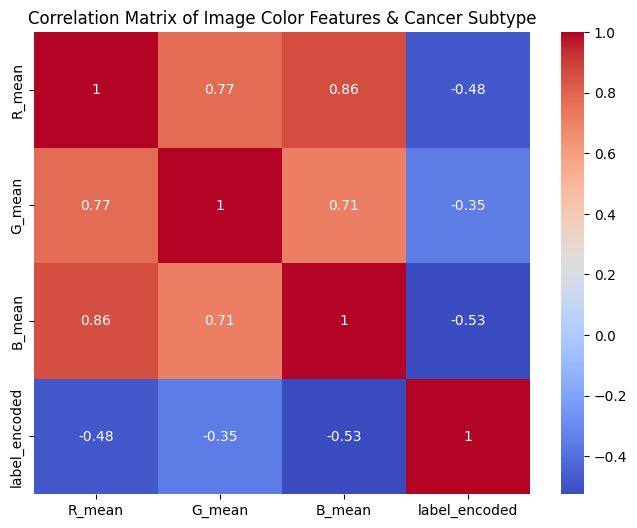

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Encode labels for correlation
df['label_encoded'] = df['label'].astype('category').cat.codes

# Correlation
corr = df[['R_mean', 'G_mean', 'B_mean', 'label_encoded']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Image Color Features & Cancer Subtype")
plt.show()


In [12]:
from sklearn.feature_selection import mutual_info_classif


In [13]:
# Features and target
X = df[['R_mean', 'G_mean', 'B_mean']]
y = df['label_encoded']

# Calculate mutual information
mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)

# Put into DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

mi_df


,Feature,Mutual Information
0,R_mean,0.394361
2,B_mean,0.358500
1,G_mean,0.243077


<ipython-input-14-49d42116b69d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='Mutual Information', y='Feature', palette='magma')


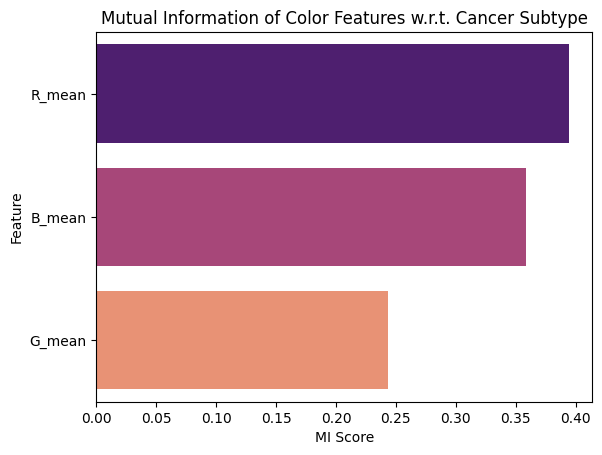

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=mi_df, x='Mutual Information', y='Feature', palette='magma')
plt.title("Mutual Information of Color Features w.r.t. Cancer Subtype")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()


In [15]:
from sklearn.decomposition import PCA


In [16]:
# Features to reduce
X = df[['R_mean', 'G_mean', 'B_mean']]

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to DataFrame
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]


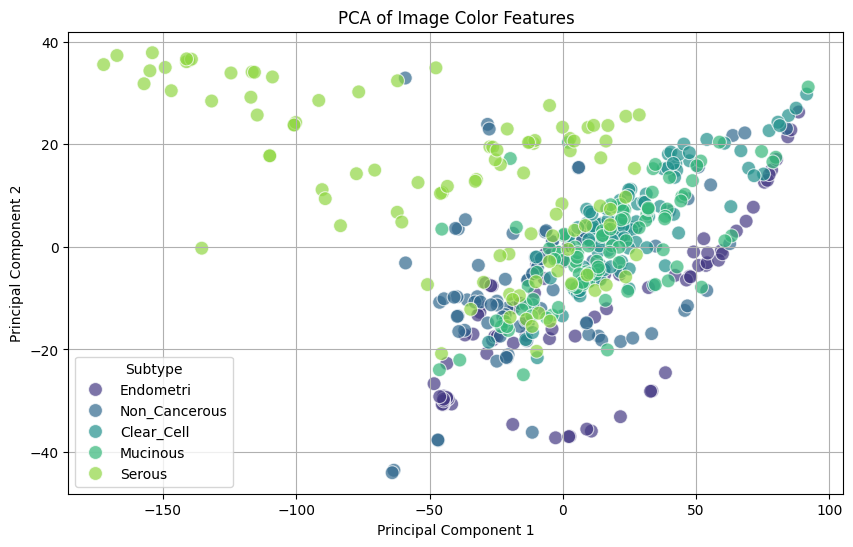

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='label', palette='viridis', s=100, alpha=0.7)
plt.title("PCA of Image Color Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Subtype')
plt.grid(True)
plt.show()


In [18]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())


Explained Variance Ratio: [0.85187359 0.10583942]
Total Variance Explained: 0.9577130148893414
